### Summary of Observations

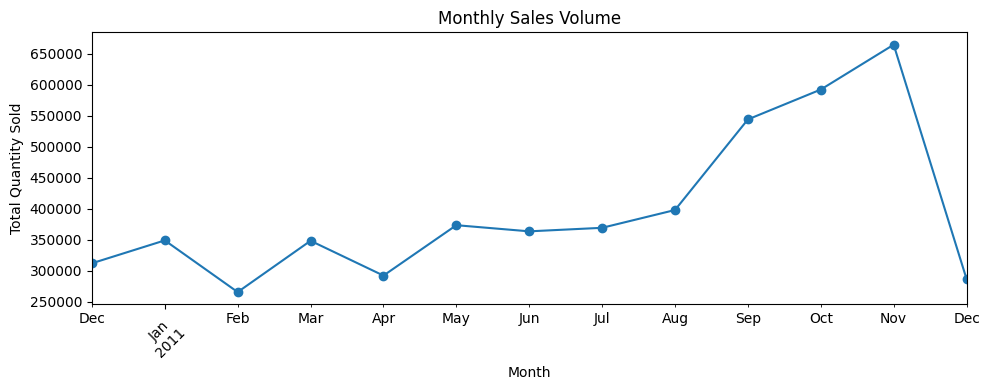

The monthly sales illustrate the total sales for each month. This tells us about potential seasonal patterns in customer purchasing behavior. Peaks in sales could indicate periods of increased demand, possibly due to holidays or seasonal promotions (probably black friday sales in November). Identifying these trends can help in planning inventory, marketing campaigns and sales strategies to make the best possible use of the high demand.


Next, I analyzed customer segmentation based on purchasing behavior. The metrics in focus are the total revenue per customer and the number of orders per customer. This was then used to cluster and identify different types of customers, such as high-value customers, frequent shoppers, and those who may need additional engagement to increase their purchasing frequency or amount.

I caluclated the average total spending and the average number of orders for each cluster to observe the purchasing behavior of different clusters.

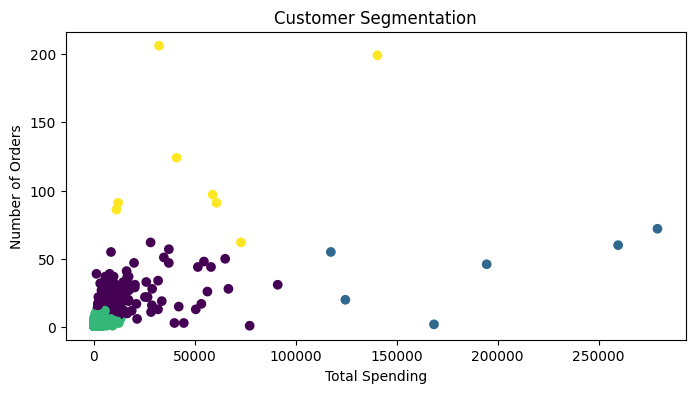

|index|Cluster|TotalSpending|Orders|
|-----|-------|-------------|------|
|0    |0      |11809.65135  |20.406|
|1    |1      |190627.12833 |42.5  |
|2    |2      |1078.9850722 |3.0328|
|3    |3      |53677.8925   |119.5 |

There are clusters which are meaningful, each can have a different strategy.
The data helps us understand consumer behaviors better based on the segments, different clusters can be targeted in different ways based on spending patterns.

0: Customers with moderate (avg) spending and frequent orders. These are regular customers with consistent purchasing behavior.

1: This cluster has a significantly high average spending and a higher number of orders. These could be prime targets for premium offers and loyalty programs.

2: These have lowest average spending and fewer orders, this indicates that these are occasionnal shoppers. These could also be new customers who have not yet fully engaged with the platform.

3: These customers have high average spending and the highest order frequency, this indicates frequent shoppers. They are crucial to the business due to their consistent high spending.

In conclusion, this is eztremely useful as different marketing strategies can be implemented for different customer groups. Cluster 3 can be offered loyalty programs, personalized promotions to Cluster 1, and engagement campaigns to convert Cluster 2 into more frequent shoppers.

Next, I wanted to analyze product preferences cluster wise. This could help in targeted marketing.

| index | Cluster | Description                           | Quantity |
|-------|---------|---------------------------------------|----------|
| 1671  |   0     | MEDIUM CERAMIC TOP STORAGE JAR        | 75165    |
| 3202  |   0     | WORLD WAR 2 GLIDERS ASSTD DESIGNS     | 25837    |
| 1474  |   0     | JUMBO BAG RED RETROSPOT               | 21634    |
| 2174  |   0     | POPCORN HOLDER                        | 19608    |
| 1874  |   0     | PACK OF 12 LONDON TISSUES             | 15811    |
| 4078  |   1     | PAPER CRAFT, LITTLE BIRDIE            | 80995    |
| 4177  |   1     | RABBIT NIGHT LIGHT                    | 6337     |
| 3555  |   1     | CREAM HEART CARD HOLDER               | 5946     |
| 4467  |   1     | SPACEBOY LUNCH BOX                    | 5774     |
| 3797  |   1     | HEART OF WICKER SMALL                 | 5685     |
| 8362  |   2     | WORLD WAR 2 GLIDERS ASSTD DESIGNS     | 27330    |
| 6383  |   2     | JUMBO BAG RED RETROSPOT               | 18477    |
| 4871  |   2     | ASSORTED COLOUR BIRD ORNAMENT         | 18147    |
| 6879  |   2     | PACK OF 72 RETROSPOT CAKE CASES       | 18111    |
| 8276  |   2     | WHITE HANGING HEART T-LIGHT HOLDER    | 15226    |
| 9552  |   3     | GROW A FLYTRAP OR SUNFLOWER IN TIN    | 5040     |
| 10232 |   3     | PINK BLUE FELT CRAFT TRINKET BOX      | 4571     |
| 9736  |   3     | JUMBO BAG RED RETROSPOT               | 3743     |
| 9734  |   3     | JUMBO BAG PINK POLKADOT               | 2841     |
| 9336  |   3     | FELTCRAFT DOLL MOLLY                  | 2683     |

Each cluster seems to have its own set of preferences in terms of products that they have purchased. This provides us insights into the interests and preferences of each cluster, which can be used for promotional offers and marketing cluster wise.


### In-class analysis

In [ ]:
# Load Google Drive into Colab #

from google.colab import drive
drive.mount('/content/drive')

# Load Packages #

import os

import pandas as pd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir("/content/drive/MyDrive/")

In [ ]:
df = pd.read_csv('./UCI Dataset/UCI E - Commerce.csv', encoding='latin')

In [ ]:
df = df.loc[df['Quantity'] > 0 ]
df = df.loc[df['UnitPrice'] > 0.01 ]
df = df.loc[df['CustomerID'].notnull() ]
df = df.loc[-(df['Description'].str.contains("POSTAGE"))]
df = df.loc[-(df['Description'].str.contains("Manual"))]


#|(df['Description'] != "DOTCOM POSTAGE")|(df['Description'] != "Manual")


In [ ]:
df.shape[0]

396481

In [ ]:
df.to_csv('filtered_uci.csv')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Most "Invoiced Item"

df['Description'].value_counts().head(20)

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1723
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1396
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
PACK OF 72 RETROSPOT CAKE CASES       1068
PAPER CHAIN KIT 50'S CHRISTMAS        1019
SPOTTY BUNTING                        1017
LUNCH BAG SPACEBOY DESIGN             1008
LUNCH BAG CARS BLUE                    989
HEART OF WICKER SMALL                  985
NATURAL SLATE HEART CHALKBOARD         980
LUNCH BAG PINK POLKADOT                957
REX CASH+CARRY JUMBO SHOPPER           952
LUNCH BAG SUKI DESIGN                  933
ALARM CLOCK BAKELIKE RED               899
LUNCH BAG APPLE DESIGN                 895
Name: Description, dtype: int64

In [ ]:
# Most Commonly Purchased by Quantity #

pd.pivot_table(df = df,
               index = 'Description',
               values = 'Quantity',
               aggfunc = np.sum).reset_index().sort_values("Quantity", ascending = False).head(20)

,Description,Quantity
2316,"PAPER CRAFT , LITTLE BIRDIE",80995
1991,MEDIUM CERAMIC TOP STORAGE JAR,77916
3782,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
1761,JUMBO BAG RED RETROSPOT,46181
3694,WHITE HANGING HEART T-LIGHT HOLDER,36725
216,ASSORTED COLOUR BIRD ORNAMENT,35362
2267,PACK OF 72 RETROSPOT CAKE CASES,33693
2597,POPCORN HOLDER,30931
2652,RABBIT NIGHT LIGHT,27202
2046,MINI PAINT SET VINTAGE,26076


In [ ]:
# Most Commonly Purchased by Revenues #

df['Revenue'] = df['Quantity']*df['UnitPrice']

temp = pd.pivot_table(df = df,
                      index = 'Description',
                      values = 'Revenue',
                      aggfunc = np.sum).reset_index().sort_values("Revenue", ascending = False)

temp['Total Revenue'] = temp['Revenue'].sum()

temp['Share'] = (temp['Revenue'] / temp['Total Revenue'])*100

temp.sort_values("Revenue", ascending = False).head(20)

,Description,Revenue,Total Revenue,Share
2316,"PAPER CRAFT , LITTLE BIRDIE",168469.60,8767917.65,1.921432
2763,REGENCY CAKESTAND 3 TIER,142592.95,8767917.65,1.626303
3694,WHITE HANGING HEART T-LIGHT HOLDER,100448.15,8767917.65,1.145633
1761,JUMBO BAG RED RETROSPOT,85220.78,8767917.65,0.971961
1991,MEDIUM CERAMIC TOP STORAGE JAR,81416.73,8767917.65,0.928575
2342,PARTY BUNTING,68844.33,8767917.65,0.785184
216,ASSORTED COLOUR BIRD ORNAMENT,56580.34,8767917.65,0.645311
2652,RABBIT NIGHT LIGHT,51346.20,8767917.65,0.585615
722,CHILLI LIGHTS,46286.51,8767917.65,0.527908
2310,PAPER CHAIN KIT 50'S CHRISTMAS,42660.83,8767917.65,0.486556


<Axes: xlabel='Quantity', ylabel='UnitPrice'>

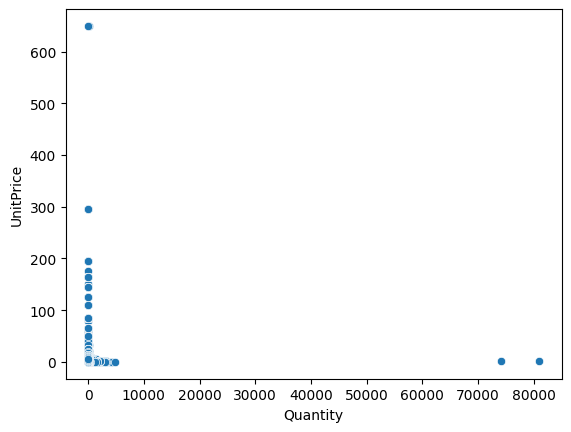

In [ ]:
sns.scatterplot(df = df,
              x = 'Quantity',
              y = 'UnitPrice'
              )

In [ ]:
df['Quantity'].describe()

count    396481.000000
mean         13.008187
std         179.608765
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [ ]:
df.sort_values("Quantity").head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
212615,555499,23010,CIRCUS PARADE BABY GIFT SET,1,6/3/2011 15:31,16.95,15812.0,United Kingdom,16.95
93617,544303,22964,3 PIECE SPACEBOY COOKIE CUTTER SET,1,2/17/2011 13:28,2.10,18116.0,United Kingdom,2.10
93616,544303,84596B,SMALL DOLLY MIX DESIGN ORANGE BOWL,1,2/17/2011 13:28,1.25,18116.0,United Kingdom,1.25
93615,544303,84596E,SMALL LICORICE DES PINK BOWL,1,2/17/2011 13:28,1.25,18116.0,United Kingdom,1.25
93614,544303,84596F,SMALL MARSHMALLOWS PINK BOWL,1,2/17/2011 13:28,1.25,18116.0,United Kingdom,1.25
93613,544303,84596L,BISCUITS SMALL BOWL LIGHT BLUE,1,2/17/2011 13:28,1.25,18116.0,United Kingdom,1.25
93612,544303,84596J,MIXED NUTS LIGHT GREEN BOWL,1,2/17/2011 13:28,1.25,18116.0,United Kingdom,1.25
93611,544303,20856,DENIM PATCH PURSE PINK BUTTERFLY,1,2/17/2011 13:28,1.65,18116.0,United Kingdom,1.65
93610,544303,20854,BLUE PATCH PURSE PINK HEART,1,2/17/2011 13:28,1.65,18116.0,United Kingdom,1.65
93609,544303,20857,BLUE ROSE PATCH PURSE PINK BUTTERFL,1,2/17/2011 13:28,1.65,18116.0,United Kingdom,1.65


In [ ]:
subsample  = df.loc[df['Quantity'] < 5000]
subsample  = subsample.loc[df['UnitPrice'] < 10]


<Axes: xlabel='Quantity', ylabel='UnitPrice'>

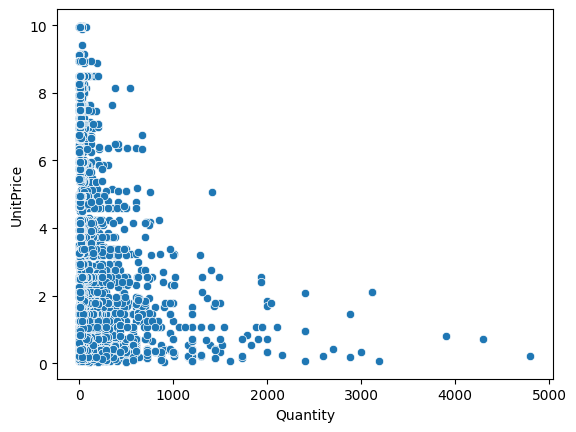

In [ ]:
sns.scatterplot(df = subsample,
              x = 'Quantity',
              y = 'UnitPrice'
              )

In [ ]:
# Most Commonly Purchased by Revenues #

df['Revenue'] = df['Quantity']*df['UnitPrice']

temp = pd.pivot_table(df = df,
                      index = 'Description',
                      values = 'Revenue',
                      aggfunc = np.sum).reset_index().sort_values("Revenue", ascending = False)

temp['Total Revenue'] = temp['Revenue'].sum()

temp['Share'] = (temp['Revenue'] / temp['Total Revenue'])*100

temp.sort_values("Revenue", ascending = False)

revenuedata = temp.copy()

# Most Commonly Purchased by Price #

pricedata = pd.pivot_table(df = df,
                        index = 'Description',
                        values = 'UnitPrice',
                        aggfunc = np.max).reset_index().sort_values('UnitPrice', ascending = False)

# Combine Data #

Combined = revenuedata.merge(pricedata,
                             on = 'Description')

Combined = Combined.sort_values("UnitPrice", ascending = False)

In [ ]:
Combined = Combined.sort_values("Share", ascending = False)
Combined = Combined.reset_index()
Combined['Rank'] = Combined.index + 1

In [ ]:
Combined.loc[Combined['Rank'] < 500]['Share'].sum()

  #['Share'].sum()

67.77132469988467

In [ ]:
Top500Products = Combined[['Description', 'Rank']]

In [ ]:
temp = df.merge(Top500Products,
           on = 'Description',
           how = 'inner')

In [ ]:
customerdata = pd.pivot_table(df = temp,
                              index = 'CustomerID',
                              columns = 'Rank',
                              values = 'Revenue',
                              aggfunc = np.sum).reset_index().fillna(0)

In [ ]:
customerdata.sort_values(2)

Rank,CustomerID,1,2,3,4,5,6,7,8,9,...,3864,3865,3866,3867,3868,3869,3870,3871,3872,3873
0,12346.0,0.0,0.00,0.00,0.00,77183.60,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2762,16115.0,0.0,0.00,0.00,14.56,6.25,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2763,16116.0,0.0,0.00,0.00,0.00,0.00,0.00,13.52,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2764,16117.0,0.0,0.00,14.75,0.00,0.00,9.90,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2765,16119.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,15465.0,0.0,3874.35,0.00,0.00,0.00,0.00,121.68,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1879,14911.0,0.0,4043.70,2081.10,226.20,159.84,479.75,310.96,99.84,111.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,12471.0,0.0,4730.40,0.00,0.00,0.00,0.00,0.00,184.32,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4090,17949.0,0.0,8015.40,0.00,0.00,0.00,0.00,0.00,0.00,237.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Submission Code

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [ ]:
popular_products = df['Description'].value_counts().head(10)
print(popular_products)

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1723
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1396
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
PACK OF 72 RETROSPOT CAKE CASES       1068
PAPER CHAIN KIT 50'S CHRISTMAS        1019
Name: Description, dtype: int64


In [ ]:
sales_by_country = df['Country'].value_counts()
print(sales_by_country)

United Kingdom          354026
Germany                   8658
France                    8036
EIRE                      7234
Spain                     2422
Netherlands               2322
Belgium                   1935
Switzerland               1810
Portugal                  1425
Australia                 1181
Norway                    1048
Channel Islands            747
Italy                      741
Finland                    647
Cyprus                     612
Sweden                     428
Austria                    384
Denmark                    367
Poland                     325
Japan                      321
Israel                     248
Unspecified                244
Singapore                  215
Iceland                    182
USA                        179
Canada                     150
Greece                     142
Malta                      109
United Arab Emirates        67
European Community          57
RSA                         57
Lebanon                     45
Lithuani

Analyzing trends over time to observe how sales have changed over time.


In [ ]:
df['InvoiceDate'].describe()

<ipython-input-54-eb448c29fc46>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['InvoiceDate'].describe()


count                  396481
unique                  17179
top       2011-11-14 15:27:00
freq                      541
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

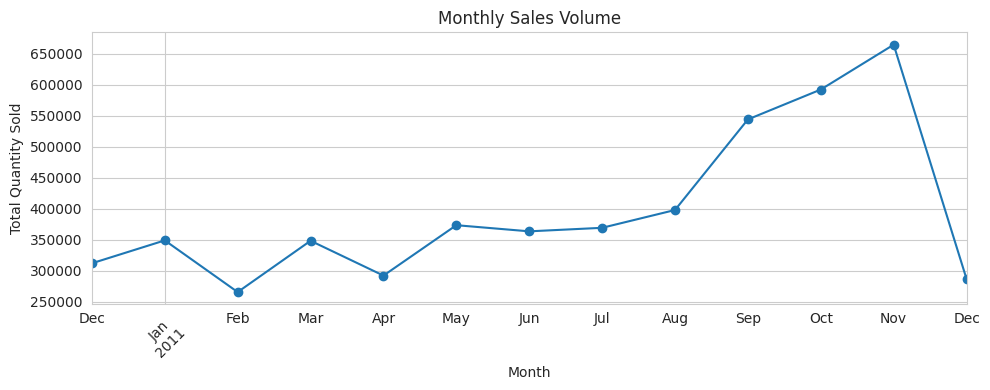

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['Quantity'].sum()

plt.figure(figsize=(10, 4))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Volume')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The monthly sales illustrate the total sales for each month. This tells us about potential seasonal patterns in customer purchasing behavior. Peaks in sales could indicate periods of increased demand, possibly due to holidays or seasonal promotions (probably black friday sales in November). Identifying these trends can help in planning inventory, marketing campaigns and sales strategies to make the best possible use of the high demand.

Analyzing customer segmentation based on purchasing behavior. The metrics in focus are the total revenue per customer and the number of orders per customer.

In [ ]:
customer_spending = df.groupby('CustomerID')['Revenue'].sum()
# print(customer_spending)
orders_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()
# print(orders_per_customer)
customer_metrics = pd.DataFrame({'TotalSpending': customer_spending, 'Orders': orders_per_customer}).reset_index()
print(customer_metrics.head(20))

    CustomerID  TotalSpending  Orders
0      12346.0       77183.60       1
1      12347.0        4310.00       7
2      12348.0        1437.24       4
3      12349.0        1457.55       1
4      12350.0         294.40       1
5      12352.0        1385.74       7
6      12353.0          89.00       1
7      12354.0        1079.40       1
8      12355.0         459.40       1
9      12356.0        2487.43       3
10     12357.0        6207.67       1
11     12358.0         928.06       2
12     12359.0        6372.58       4
13     12360.0        2302.06       3
14     12361.0         174.90       1
15     12362.0        4737.23      10
16     12363.0         552.00       2
17     12364.0        1208.10       4
18     12365.0         320.69       1
19     12367.0         150.90       1


This can now be used to identify different types of customers, such as high-value customers, frequent shoppers, and those who may need additional engagement to increase their purchasing frequency or amount.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


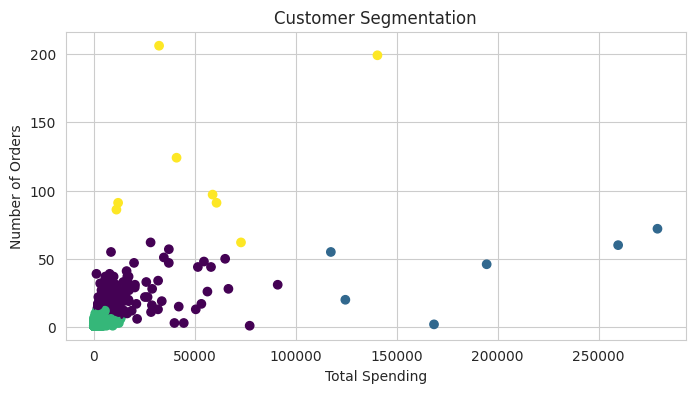

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_metrics_scaled = scaler.fit_transform(customer_metrics[['TotalSpending', 'Orders']])

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_metrics['Cluster'] = kmeans.fit_predict(customer_metrics_scaled)

plt.figure(figsize=(8, 4))
plt.scatter(customer_metrics['TotalSpending'], customer_metrics['Orders'], c=customer_metrics['Cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Total Spending')
plt.ylabel('Number of Orders')
plt.show()


Calculating the average total spending and the average number of orders for each cluster to observe the purchasing behavior of different clusters.

In [ ]:
customer_metrics['TotalSpending'] = customer_metrics['TotalSpending'].astype(float)
customer_metrics['Orders'] = customer_metrics['Orders'].astype(int)

cluster_averages = customer_metrics.groupby('Cluster').agg({'TotalSpending':'mean', 'Orders':'mean'}).reset_index()

print(cluster_averages)

   Cluster  TotalSpending      Orders
0        0   11809.651356   20.406780
1        1  190627.128333   42.500000
2        2    1078.985072    3.032803
3        3   53677.892500  119.500000


The above data helps us understand consumer behaviors better based on the segments, different clusters can be targeted in different ways based on spending patterns.


0: Customers with moderate (avg) spending and frequent orders. These are regular customers with consistent purchasing behavior.                            

1: This cluster has a significantly high average spending and a higher number of orders. These could be prime targets for premium offers and loyalty programs.


2: These have lowest average spending and fewer orders, this indicates that these are occasionnal shoppers.. These could also be new customers who have not yet fully engaged with the platform.


3: These customers have high average spending and the highest order frequency, this indicates frequent shoppers. They are crucial to the business due to their consistent high spending.

In conclusion, this is eztremely useful as different marketing strategies can be implemented for different customer groups. Cluster 3 can be offered loyalty programs, personalized promotions to Cluster 1, and engagement campaigns to convert Cluster 2 into more frequent shoppers.

Next, I wanted to analyze product preferences cluster wise. This could help in targeted marketing.

In [ ]:
df_merged = pd.merge(df, customer_metrics[['CustomerID', 'Cluster']], on='CustomerID', how='left')
top_products_per_cluster = df_merged.groupby(['Cluster', 'Description'])['Quantity'].sum().reset_index()
top_products_per_cluster = top_products_per_cluster.sort_values(['Cluster', 'Quantity'], ascending=[True, False]).groupby('Cluster').head(5)

print(top_products_per_cluster)

       Cluster                         Description  Quantity
1671         0      MEDIUM CERAMIC TOP STORAGE JAR     75165
3202         0   WORLD WAR 2 GLIDERS ASSTD DESIGNS     25837
1474         0             JUMBO BAG RED RETROSPOT     21634
2174         0                      POPCORN HOLDER     19608
1874         0          PACK OF 12 LONDON TISSUES      15811
4078         1         PAPER CRAFT , LITTLE BIRDIE     80995
4177         1                  RABBIT NIGHT LIGHT      6337
3555         1             CREAM HEART CARD HOLDER      5946
4467         1                 SPACEBOY LUNCH BOX       5774
3797         1               HEART OF WICKER SMALL      5685
8362         2   WORLD WAR 2 GLIDERS ASSTD DESIGNS     27330
6383         2             JUMBO BAG RED RETROSPOT     18477
4871         2       ASSORTED COLOUR BIRD ORNAMENT     18147
6879         2     PACK OF 72 RETROSPOT CAKE CASES     18111
8276         2  WHITE HANGING HEART T-LIGHT HOLDER     15226
9552         3  GROW A F

Each cluster seems to have its own set of preferences in terms of products that they have purchased. This provides us insights into the interests and preferences of each cluster, which can be used for promotional offers and marketing cluster wise.

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,2010-12
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2010-12
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010-12
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010-12
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010-12


Analyze clusters in different countries.

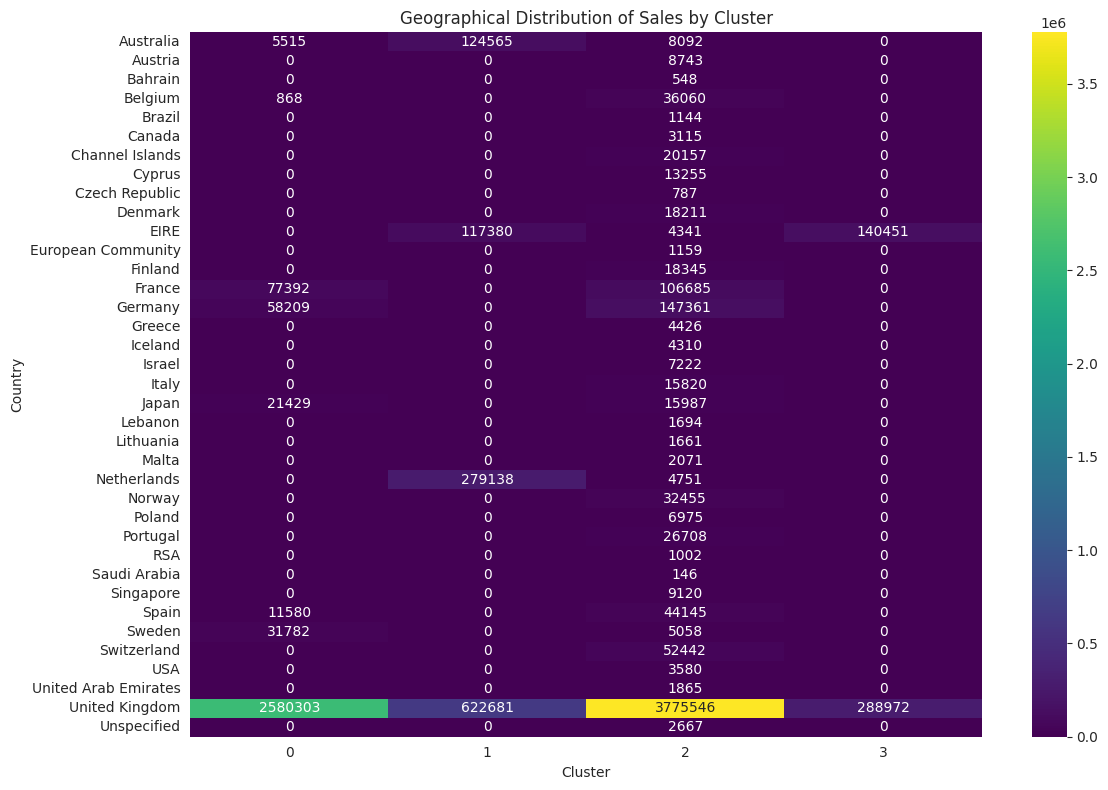

In [ ]:
country_cluster_sales = df_merged.groupby(['Country', 'Cluster'])['Revenue'].sum().reset_index()

pivot_country_cluster = country_cluster_sales.pivot(index='Country',
                                                    columns='Cluster',
                                                    values='Revenue').fillna(0)

import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_country_cluster, annot=True, fmt='.0f', cmap='viridis')
plt.title('Geographical Distribution of Sales by Cluster')
plt.ylabel('Country')
plt.xlabel('Cluster')
plt.tight_layout()
plt.savefig('geographical_distribution_clusters.png')
plt.show()
